In [34]:
%matplotlib notebook

from modsim import *

In [35]:
kg = UNITS.kilogram
m = UNITS.meter
s = UNITS.second
N = UNITS.newton
degree = UNITS.degree

In [36]:
#mass of person
mass = 62.1422

In [37]:
#constants
g = 9.81
k_trampoline = 200

In [38]:
#starting conditions
init = State(y = 0,
             v = 3)

In [39]:
duration = .30581039755351*2
ts = linrange (0, duration, .01)

In [40]:
system = System(init=init, g=g, ts=ts)

In [41]:
def slope_func(state, t, system):
    y, v = state
    unpack(system)
    
    dydt = v
    dvdt = -g
    
    return dydt, dvdt

In [42]:
slope_func(init, 0 , system)

(3, -9.81)

In [43]:
run_odeint(system, slope_func)

In [44]:
def plot_position(results):
    newfig()
    plot(results.y, label = 'y')
    
    decorate(xlabel = 'Time (s)',
             ylabel = 'Position (m)')

<IPython.core.display.Javascript object>


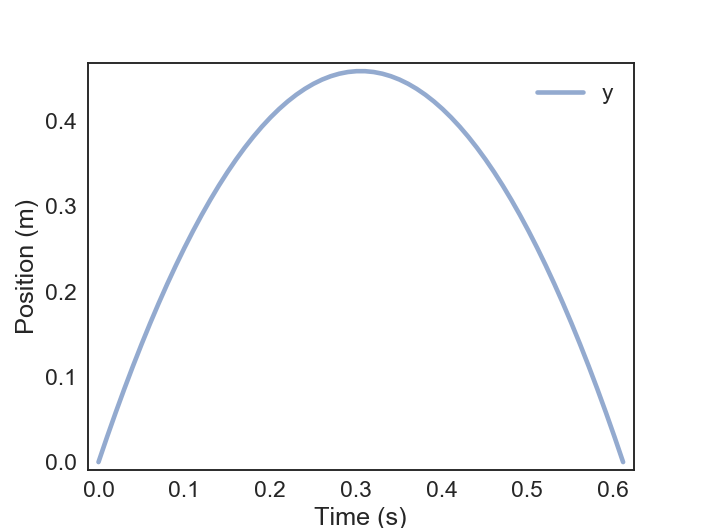

In [45]:
plot_position(system.results)

In [46]:
d = 0.45859872611464

In [47]:
v_final_down = sqrt(2*g*d) #vertical velocity right before contact with trampoline
t = sqrt(2*d/g) #time to reach trampoline
p = mass * v_final_down #momentum at bottom
force_down = p/t #force applied to trampoline
tramp_displace = force_down / k_trampoline #trampoline displacement
tramp_PE = 0.5 * k_trampoline * tramp_displace**2 #elastic potential energy of trampoline

tramp_PE

929.07606569715108

In [48]:
k = 2

In [49]:
#legs
x = .2
leg_PE = 1/2 * k * x**2

In [50]:
Total_PE = tramp_PE + leg_PE

In [51]:
v_up = sqrt(2 * Total_PE / mass)

In [52]:
init_up = State(y = 0,
                v = v_up)

In [53]:
duration_up = v_up/g/s + duration

DimensionalityError: Cannot convert from '1 / second' to 'dimensionless'

In [54]:
ts_up = linrange(duration, duration_up, .01)

In [55]:
system_up = System(init=init_up, g=g, ts=ts)

In [56]:
slope_func(init_up, 0, system_up)

(5.4683546188076919, -9.81)

In [57]:
run_odeint(system_up, slope_func)

<IPython.core.display.Javascript object>


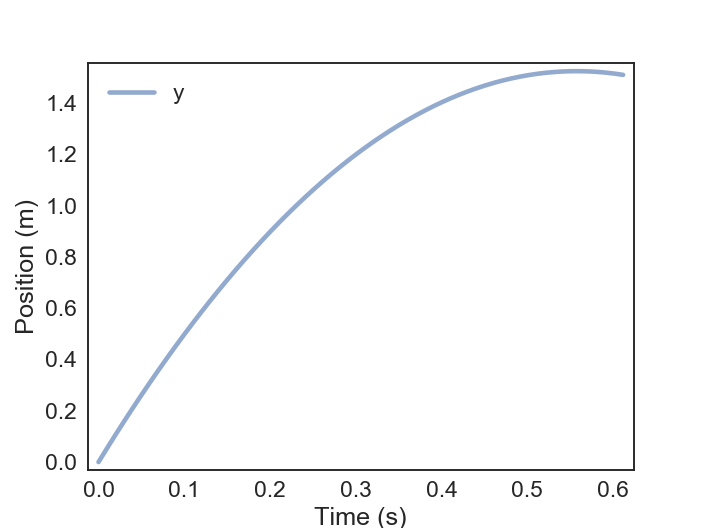

In [58]:
plot_position(system_up.results)

In [59]:
k_values = linspace(0, 100, 21)
x = .2
sweep = SweepSeries()

for k in k_values:
    sweep[k] = k    

In [60]:
k_values

array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
         45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
         90.,   95.,  100.])